<a href="https://colab.research.google.com/github/mpartain1/Project2CodingDojo/blob/main/Project2Pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Data Set 1
#Source of Data: UCI Machine Learning Repository

#This data set relates to the quality of "Vinho Verde" red wine.  It contains attributes such as fixed acidity, 
#chlorides, and residual sugar.

#The target is quality (score between 0 and 10)

#This is a regression problem

#12 features

#4898 rows of data

#Challenge could be trying to assess the most influential factors that predict wine quality.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('/content/winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


No unnecessary columns to delete

In [11]:
df.drop_duplicates(inplace=True, keep = 'first')

In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No NA values

No categorical values to address inconcistencies for

Below are univariate visualizations of the columns.


Upper Outliers:
       fixed acidity
596            12.4
338            12.4
548            12.4
510            12.4
516            12.5
409            12.5
264            12.5
339            12.5
446            12.5
472            12.5
363            12.5
814            12.6
1224           12.6
359            12.6
440            12.6
560            12.7
394            12.7
599            12.7
205            12.8
429            12.8
364            12.8
811            12.9
538            12.9
559            13.0
470            13.0
601            13.2
611            13.2
509            13.3
294            13.3
680            13.3
328            13.4
353            13.5
381            13.7
347            13.8
374            14.0
544            14.3
243            15.0
554            15.5
442            15.6
557            15.6
652            15.9
Lower Outliers:
 Empty DataFrame
Columns: [fixed acidity]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7f32275a6450>],
 'caps': [<matplotlib.lines.Line2D at 0x7f32275ac490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f32275344d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f32275acf50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f32275a69d0>,
  <matplotlib.lines.Line2D at 0x7f32275a6f10>]}

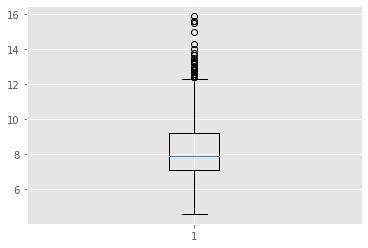

In [54]:
upper_outlier_value = 1.5*(df['fixed acidity'].describe()[6]-df['fixed acidity'].describe()[4]) + df['fixed acidity'].describe()[6]
lower_outlier_value =  df['fixed acidity'].describe()[4]-1.5*(df['fixed acidity'].describe()[6]-df['fixed acidity'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['fixed acidity']>upper_outlier_value, 'fixed acidity'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['fixed acidity']<lower_outlier_value, 'fixed acidity'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')
plt.style.use('ggplot')
plt.boxplot(df['fixed acidity'])


Upper Outliers:
       residual sugar
1138            3.70
1552            3.70
442             3.70
408             3.70
1471            3.75
...              ...
1244           13.40
1474           13.80
1574           13.90
1434           15.40
480            15.50

[126 rows x 1 columns]
Lower Outliers:
 Empty DataFrame
Columns: [residual sugar]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7f322751bc10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3227520c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3227528c90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3227528750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f32275201d0>,
  <matplotlib.lines.Line2D at 0x7f3227520710>]}

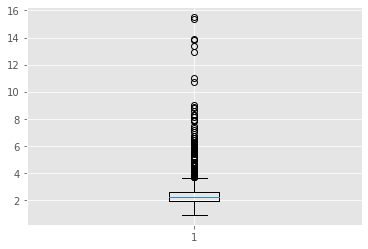

In [55]:
upper_outlier_value = 1.5*(df['residual sugar'].describe()[6]-df['residual sugar'].describe()[4]) + df['residual sugar'].describe()[6]
lower_outlier_value =  df['residual sugar'].describe()[4]-1.5*(df['residual sugar'].describe()[6]-df['residual sugar'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['residual sugar']>upper_outlier_value, 'residual sugar'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['residual sugar']<lower_outlier_value, 'residual sugar'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['residual sugar'])

Upper Outliers:
       volatile acidity
94               1.020
1261             1.020
899              1.020
700              1.020
710              1.025
705              1.035
1467             1.040
134              1.040
553              1.040
120              1.070
199              1.090
724              1.115
38               1.130
1312             1.180
690              1.185
672              1.240
127              1.330
126              1.330
1299             1.580
Lower Outliers:
 Empty DataFrame
Columns: [volatile acidity]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7f32274995d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f322749e610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f32274a6650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f32274a6110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3227499b50>,
  <matplotlib.lines.Line2D at 0x7f322749e0d0>]}

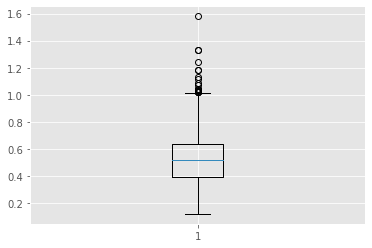

In [56]:
upper_outlier_value = 1.5*(df['volatile acidity'].describe()[6]-df['volatile acidity'].describe()[4]) + df['volatile acidity'].describe()[6]
lower_outlier_value =  df['volatile acidity'].describe()[4]-1.5*(df['volatile acidity'].describe()[6]-df['volatile acidity'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['volatile acidity']>upper_outlier_value, 'volatile acidity'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['volatile acidity']<lower_outlier_value, 'volatile acidity'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['volatile acidity'])

Upper Outliers:
      citric acid
151          1.0
Lower Outliers:
 Empty DataFrame
Columns: [citric acid]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7f3227415490>],
 'caps': [<matplotlib.lines.Line2D at 0x7f322741a4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3227420510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f322741af90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3227415a10>,
  <matplotlib.lines.Line2D at 0x7f3227415f50>]}

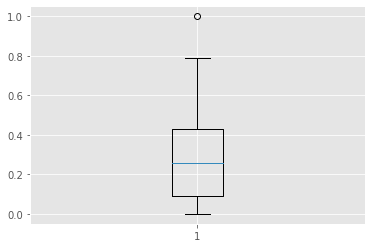

In [57]:
upper_outlier_value = 1.5*(df['citric acid'].describe()[6]-df['citric acid'].describe()[4]) + df['citric acid'].describe()[6]
lower_outlier_value =  df['citric acid'].describe()[4]-1.5*(df['citric acid'].describe()[6]-df['citric acid'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['citric acid']>upper_outlier_value, 'citric acid'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['citric acid']<lower_outlier_value, 'citric acid'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['citric acid'])

Upper Outliers:
       chlorides
1020      0.123
1423      0.123
1258      0.123
1252      0.123
624       0.124
...         ...
692       0.422
81        0.464
106       0.467
151       0.610
258       0.611

[83 rows x 1 columns]
Lower Outliers:
       chlorides
836       0.012
695       0.034
797       0.038
1571      0.038


{'boxes': [<matplotlib.lines.Line2D at 0x7f3227386b90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f322738fbd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3227395c10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f32273956d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f322738f150>,
  <matplotlib.lines.Line2D at 0x7f322738f690>]}

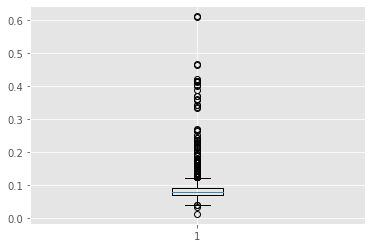

In [58]:
upper_outlier_value = 1.5*(df['chlorides'].describe()[6]-df['chlorides'].describe()[4]) + df['chlorides'].describe()[6]
lower_outlier_value =  df['chlorides'].describe()[4]-1.5*(df['chlorides'].describe()[6]-df['chlorides'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['chlorides']>upper_outlier_value, 'chlorides'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['chlorides']<lower_outlier_value, 'chlorides'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['chlorides'])

Upper Outliers:
       free sulfur dioxide
1217                 43.0
1256                 43.0
497                  43.0
1075                 45.0
1156                 45.0
678                  45.0
634                  46.0
522                  47.0
1231                 48.0
1474                 48.0
1175                 48.0
57                   50.0
1154                 50.0
1295                 51.0
982                  51.0
15                   51.0
1358                 52.0
14                   52.0
926                  52.0
925                  53.0
584                  54.0
1434                 55.0
1131                 57.0
1558                 66.0
396                  68.0
1244                 72.0
Lower Outliers:
 Empty DataFrame
Columns: [free sulfur dioxide]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7f32272fa250>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3227300290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f32273092d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3227300d50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f32272fa7d0>,
  <matplotlib.lines.Line2D at 0x7f32272fad10>]}

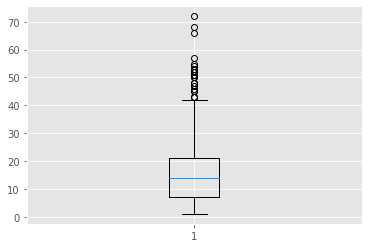

In [59]:
upper_outlier_value = 1.5*(df['free sulfur dioxide'].describe()[6]-df['free sulfur dioxide'].describe()[4]) + df['free sulfur dioxide'].describe()[6]
lower_outlier_value =  df['free sulfur dioxide'].describe()[4]-1.5*(df['free sulfur dioxide'].describe()[6]-df['free sulfur dioxide'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['free sulfur dioxide']>upper_outlier_value, 'free sulfur dioxide'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['free sulfur dioxide']<lower_outlier_value, 'free sulfur dioxide'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['free sulfur dioxide'])

Upper Outliers:
       total sulfur dioxide
694                  125.0
88                   125.0
192                  126.0
723                  127.0
190                  127.0
155                  128.0
463                  129.0
154                  129.0
791                  130.0
1559                 131.0
522                  133.0
1419                 133.0
92                   133.0
415                  134.0
130                  134.0
1131                 135.0
313                  135.0
86                   136.0
741                  139.0
90                   140.0
145                  141.0
1400                 141.0
523                  142.0
188                  143.0
771                  143.0
772                  144.0
189                  144.0
219                  144.0
14                   145.0
637                  145.0
201                  145.0
636                  147.0
1493                 147.0
649                  148.0
15                   148.0
591        

{'boxes': [<matplotlib.lines.Line2D at 0x7f3226fa0bd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3226fa8c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3226fb0c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3226fb0710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3226fa8190>,
  <matplotlib.lines.Line2D at 0x7f3226fa86d0>]}

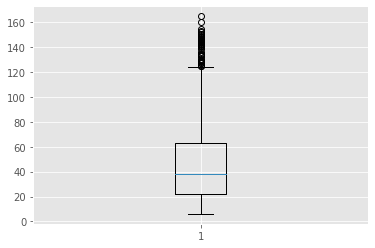

In [68]:
upper_outlier_value = 1.5*(df['total sulfur dioxide'].describe()[6]-df['total sulfur dioxide'].describe()[4]) + df['total sulfur dioxide'].describe()[6]
lower_outlier_value =  df['total sulfur dioxide'].describe()[4]-1.5*(df['total sulfur dioxide'].describe()[6]-df['total sulfur dioxide'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['total sulfur dioxide']>upper_outlier_value, 'total sulfur dioxide'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['total sulfur dioxide']<lower_outlier_value, 'total sulfur dioxide'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')
df.drop([1079, 1081], inplace=True)

plt.style.use('ggplot')
plt.boxplot(df['total sulfur dioxide'])

Upper Outliers:
       density
294   1.00140
374   1.00140
381   1.00140
415   1.00140
538   1.00140
324   1.00150
353   1.00180
559   1.00210
364   1.00220
1474  1.00242
608   1.00260
480   1.00260
889   1.00289
554   1.00315
557   1.00315
442   1.00320
1434  1.00369
Lower Outliers:
       density
1017  0.99007
1114  0.99020
836   0.99064
1269  0.99080
1270  0.99084
354   0.99120
1126  0.99150
821   0.99154
1228  0.99157
142   0.99160
999   0.99162
588   0.99170
1475  0.99182
1477  0.99182
1298  0.99191
695   0.99210
1122  0.99220
591   0.99220


{'boxes': [<matplotlib.lines.Line2D at 0x7f3227263d50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f322726ad90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f322726edd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f322726e890>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f322726a310>,
  <matplotlib.lines.Line2D at 0x7f322726a850>]}

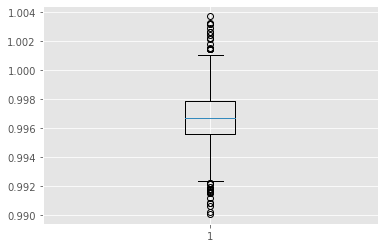

In [61]:
upper_outlier_value = 1.5*(df['density'].describe()[6]-df['density'].describe()[4]) + df['density'].describe()[6]
lower_outlier_value =  df['density'].describe()[4]-1.5*(df['density'].describe()[6]-df['density'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['density']>upper_outlier_value, 'density'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['density']<lower_outlier_value, 'density'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['density'])

Upper Outliers:
         pH
930   3.69
268   3.69
1270  3.70
996   3.71
1377  3.71
821   3.71
1488  3.72
588   3.72
553   3.74
94    3.75
1111  3.78
1300  3.78
95    3.85
695   3.90
45    3.90
1316  4.01
1321  4.01
Lower Outliers:
         pH
151   2.74
544   2.86
614   2.87
440   2.88
1470  2.88
650   2.89
1017  2.89
1319  2.90
554   2.92
557   2.92
657   2.92


{'boxes': [<matplotlib.lines.Line2D at 0x7f32271dbd50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f32271e2a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f32271eba50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f32271eb510>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f32271e2310>,
  <matplotlib.lines.Line2D at 0x7f32271e2850>]}

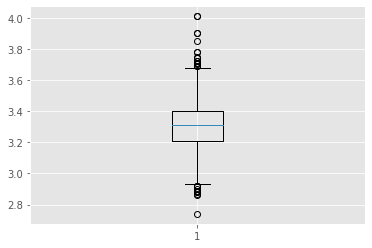

In [62]:
upper_outlier_value = 1.5*(df['pH'].describe()[6]-df['pH'].describe()[4]) + df['pH'].describe()[6]
lower_outlier_value =  df['pH'].describe()[4]-1.5*(df['pH'].describe()[6]-df['pH'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['pH']>upper_outlier_value, 'pH'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['pH']<lower_outlier_value, 'pH'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['pH'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f32285fa410>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3228601450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3228609490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3228601f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f32285fa990>,
  <matplotlib.lines.Line2D at 0x7f32285faed0>]}

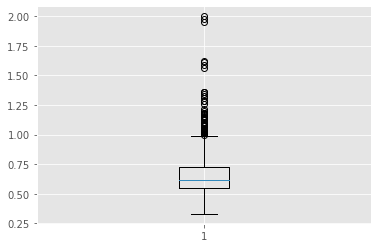

In [31]:
upper_outlier_value = 1.5*(df['sulphates'].describe()[6]-df['sulphates'].describe()[4]) + df['sulphates'].describe()[6]
lower_outlier_value =  df['sulphates'].describe()[4]-1.5*(df['sulphates'].describe()[6]-df['sulphates'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['sulphates']>upper_outlier_value, 'sulphates'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['sulphates']<lower_outlier_value, 'sulphates'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['sulphates'])

Upper Outliers:
         alcohol
1475  13.566667
1114  13.600000
1132  13.600000
1228  13.600000
1477  13.600000
142   14.000000
467   14.000000
588   14.000000
821   14.000000
1269  14.000000
1270  14.000000
652   14.900000
Lower Outliers:
 Empty DataFrame
Columns: [alcohol]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7f3227784890>],
 'caps': [<matplotlib.lines.Line2D at 0x7f32271d2b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f32274e92d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f32272a9190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f32272c1b50>,
  <matplotlib.lines.Line2D at 0x7f32275302d0>]}

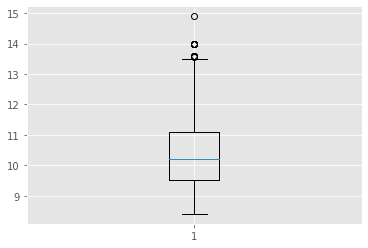

In [64]:
upper_outlier_value = 1.5*(df['alcohol'].describe()[6]-df['alcohol'].describe()[4]) + df['alcohol'].describe()[6]
lower_outlier_value =  df['alcohol'].describe()[4]-1.5*(df['alcohol'].describe()[6]-df['alcohol'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['alcohol']>upper_outlier_value, 'alcohol'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['alcohol']<lower_outlier_value, 'alcohol'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['alcohol'])

Upper Outliers:
       quality
267         8
1403        8
1269        8
1202        8
1120        8
1090        8
1061        8
1449        8
828         8
495         8
481         8
455         8
440         8
390         8
278         8
588         8
1549        8
Lower Outliers:
       quality
459         3
517         3
690         3
832         3
899         3
1299        3
1374        3
1469        3
1478        3
1505        3


{'boxes': [<matplotlib.lines.Line2D at 0x7f32275e2490>],
 'caps': [<matplotlib.lines.Line2D at 0x7f322761b7d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f32274ec950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3227651910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f32275e2850>,
  <matplotlib.lines.Line2D at 0x7f32276a36d0>]}

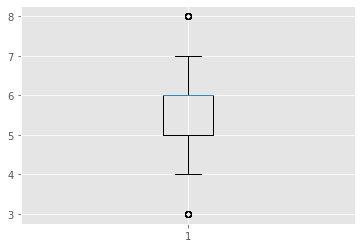

In [63]:
upper_outlier_value = 1.5*(df['quality'].describe()[6]-df['quality'].describe()[4]) + df['quality'].describe()[6]
lower_outlier_value =  df['quality'].describe()[4]-1.5*(df['quality'].describe()[6]-df['quality'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['quality']>upper_outlier_value, 'quality'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['quality']<lower_outlier_value, 'quality'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['quality'])

Sources: Geeks for Geeks, statology, w3schools, Learn Platform, towardsDev.com, shishirkant.com, datatofish.com, datasciencemadesimple.com 